In [ ]:
! nvidia-smi

Tue Jun 21 13:48:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import random 
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__
import warnings


warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# coonfig 
TRAIN_IMAGE_PATH = '/content/drive/MyDrive/CNN_digit/mini2/train'
TEST_IMAGE_PATH = '/content/drive/MyDrive/CNN_digit/mini2/validate'

Train Images


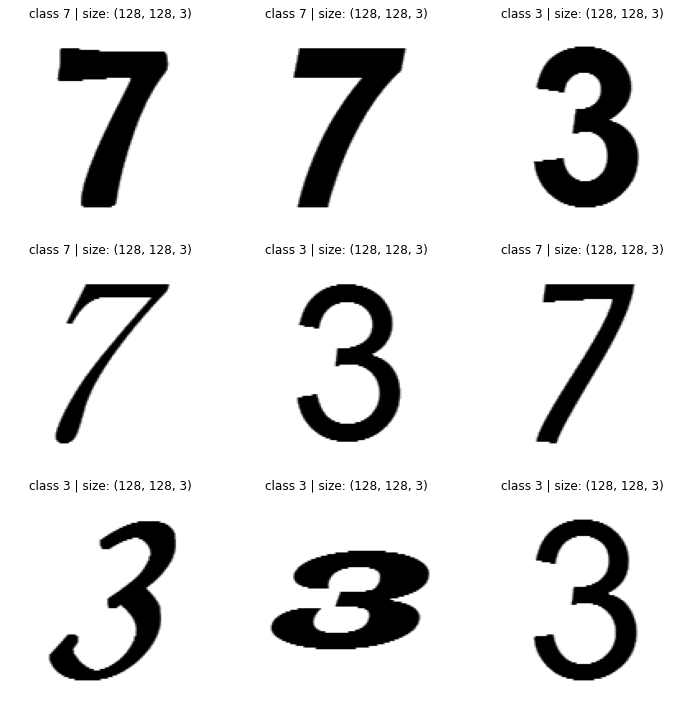

Validation Images


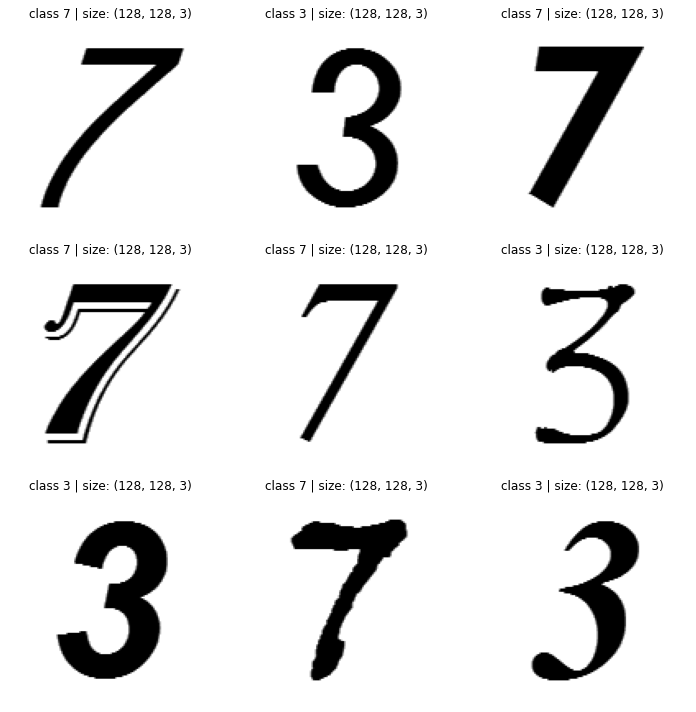

In [ ]:
# helper function
def display_images(path):
  classes = ['3','7']
  
  fig = plt.figure(figsize=(10,10))
  for image_num in range(9):
    random_class = random.choice(classes)
    img = random.choice(os.listdir(os.path.join(path,random_class)))
    full_path = os.path.join(path, os.path.join(random_class,img)) 
    img_read = mpimg.imread(full_path)
    img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,image_num + 1 )
    plt.axis('off')
    plt.title(f'class {random_class} | size: {img_read.shape} ')
    plt.imshow(img_read)
    
  plt.tight_layout()
  # fig.suptitle(f'display of {os.path.basename(path)} images')
  plt.show()

print('Train Images')
display_images(TRAIN_IMAGE_PATH)

print('Validation Images')
display_images(TEST_IMAGE_PATH)


In [ ]:
# preprocess images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_datagenn = ImageDataGenerator(rescale=1./255, 
                                  preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data = train_datagen.flow_from_directory(directory=TRAIN_IMAGE_PATH, seed=42, batch_size=32,
                                               target_size=(64,64), class_mode='binary')
val_data = train_datagen.flow_from_directory(directory=TEST_IMAGE_PATH, seed=42, batch_size=32,
                                             target_size=(64,64), class_mode='binary')

Found 2032 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [ ]:
# CNN architecture

# set seed 
tf.random.set_seed(42)


# build CNN architecture
model = tf.keras.Sequential([
        
        #first conv
        tf.keras.layers.Conv2D(input_shape=(64,64,3), filters=10, activation='relu',
                               kernel_size=3, name='first_conv_layer'),
        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu',
                               name='second_conv_layer'),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

        #second conv
        tf.keras.layers.Conv2D(filters=10, kernel_size=2, activation='relu',
                               name='third_conv_layer'),
        tf.keras.layers.Conv2D(filters=10, kernel_size=2, activation='relu',
                               name='fourth_conv_layer'),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

        # output layers
        tf.keras.layers.Flatten(name='flatten_layer'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_conv_layer (Conv2D)   (None, 62, 62, 10)        280       
                                                                 
 second_conv_layer (Conv2D)  (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 10)       0         
 2D)                                                             
                                                                 
 third_conv_layer (Conv2D)   (None, 29, 29, 10)        410       
                                                                 
 fourth_conv_layer (Conv2D)  (None, 28, 28, 10)        410       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                  

In [ ]:
history = model.fit(train_data, epochs=7, steps_per_epoch=len(train_data),
                    validation_data=val_data, validation_steps=len(val_data),
                    verbose=1)

Epoch 1/7
64/64 [==============================] - 4s 59ms/step - loss: 0.2604 - accuracy: 0.9080 - val_loss: 0.0420 - val_accuracy: 0.9859
Epoch 2/7
64/64 [==============================] - 4s 56ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 3/7
64/64 [==============================] - 4s 56ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 4/7
64/64 [==============================] - 4s 55ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/7
64/64 [==============================] - 4s 56ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 9.0708e-04 - val_accuracy: 1.0000
Epoch 6/7
64/64 [==============================] - 4s 56ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0431e-04 - val_accuracy: 1.0000
Epoch 7/7
64/64 [==============================] - 4s 56ms/step - loss: 7.2465e-04 - accuracy: 1.0000 - val_loss: 2.6102e-04 - val_accuracy: 1.0000


In [ ]:
model.evaluate(val_data)

5/5 [==============================] - 0s 63ms/step - loss: 2.6102e-04 - accuracy: 1.0000


[0.0002610157534945756, 1.0]

In [ ]:
model.save('37model.h5')

In [ ]:
import pickle as pkl
pickle_out = open('model-37.p', 'wb')
pkl.dump(model, pickle_out)
pickle_out.close() 

INFO:tensorflow:Assets written to: ram://3e705002-e95c-45d8-bc07-021a93199b76/assets
